In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
import pickle

In [17]:
DATASET_PATH = "/Users/connormaclachlan/Desktop/CS433_Project/Code/audio_features2.csv"
df = pd.read_csv(DATASET_PATH)
data = df.iloc[:,:-1]
labels = df.iloc[:,-1]

# Binarize labels
lb = preprocessing.LabelBinarizer()
lb.fit(labels)
labels = lb.transform(labels)
labels = labels.ravel()

# Split data into training and testing and validation sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=12)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=12)

X_val = abs(X_val)

model_file = "/Users/connormaclachlan/Desktop/CS433_Project/Code/DeepVoiceModel.pkl"

In [18]:
# load model from pickle file
with open(model_file, 'rb') as file:  
    model = pickle.load(file)

6/6 [==============================] - 0s 5ms/step


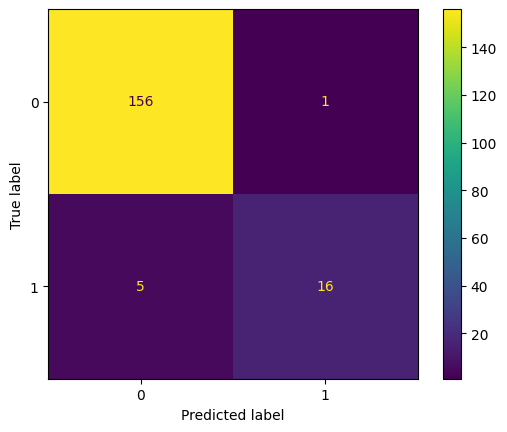

In [19]:
predicted = model.predict(np.array(X_val))
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_val)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [20]:
predictPerc = (conf_mat[0][0]+conf_mat[1][1])/(conf_mat[0][0]+conf_mat[0][1]+conf_mat[1][0]+conf_mat[1][1])*100
print(f"Prediction Accuracy: {predictPerc}%")

Prediction Accuracy: 96.62921348314607%
